# Schrodinger's Equation

## References -- move to bottom
* Atkins & Friedman (Molecular Quantum Mechanics textbook)
* Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about. 2014
* http://arxiv.org/pdf/0704.3240.pdf

Wave functions are used in quantum mechanics to describe the position of a particle at a certain time. The fundamental equation used to solve these wave functions is the Schrodinger equation. 

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi(x, t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x, t)
\end{equation}

Discretized Equation:

\begin{eqnarray}
i\hbar\frac{\psi^{n+1}_i - \psi^n_i}{\Delta t} = \frac{\hbar^2}{2m} \cdot \frac{1}{2} &\left( 
\frac{\psi^{n+1}_{i+1} - 2\psi^{n+1}_i + \psi^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{\psi^n_{i+1}-2\psi^n_i + \psi^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

In [51]:
import numpy
from scipy.linalg import solve
from scipy.interpolate import spline
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [61]:
def generateMatrix(N, sigma):
   
    ##We need a TRIDIAGONAL MATRIX!!

    # Set Diagonalfrom discritization
    d = numpy.diag(numpy.ones(N-2)*(1+2j/sigma))
       
    # Set Upper Diagonal
    ud = numpy.diag(numpy.ones(N-3)*-2j, 1)
        
    # Set Lower Diagonal
    ld = numpy.diag(numpy.ones(N-3)*-2j, -1)
        
    A = d + ud + ld
    
    return A                   

In [81]:
#This is what we know

def genRHS(psi, sigma): 
    
    x = psi[1:-1]*((2j/sigma)+1) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] += psi[0]
    x[-1] += psi[0]
    
    return x

In [63]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psi_n = psi.copy()
        x = genRHS(psi_n, sigma)
        
        psi_inside = solve(A, x)
        psi[1:-1] = psi_inside
        
    return psi

In [64]:
L = 1
nx = 21 #21

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
m = 6.6464764063e-27 #[kg] - mass of Helium ion
dx = L/(nx-1)


psi_i = numpy.zeros(nx, dtype = numpy.complex)
psi_i[0] = 1

sigma = 0.5 #0.5
dt = sigma*(dx**2)*m/hbar
nt = 10

A = generateMatrix(nx, sigma)

print(dt)

78781.69610432451


In [65]:
#print(A)

In [66]:
psi = CrankNicolson(psi_i.copy(), A, nt, sigma)

print(psi)

[  1.00000000e+00     +0.j           2.69740918e+03 -23703.34337265j
   6.72452512e+03 -40271.00191846j   1.33315572e+04 -43696.5563862j
   2.33303866e+04 -30175.82139831j   3.64721108e+04   +935.59712422j
   5.09021839e+04 +46479.70838823j   6.31667950e+04 +99498.13515718j
   6.90370727e+04+150201.28684901j   6.49752403e+04+187965.26648901j
   4.96545331e+04+203970.44383953j   2.48200630e+04+193700.45187558j
  -4.96972431e+03+158427.83894842j  -3.36767872e+04+105115.21669376j
  -5.56516599e+04 +44725.24655528j  -6.72583245e+04 -10515.4154225j
  -6.76162830e+04 -50060.02810788j  -5.82599067e+04 -67402.54112206j
  -4.20313247e+04 -61352.93763121j  -2.18526126e+04 -36074.0664706j
   0.00000000e+00     +0.j        ]


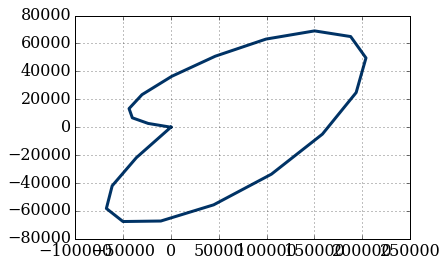

In [67]:
x = numpy.linspace(0,L,nx)

pyplot.plot(psi.imag, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

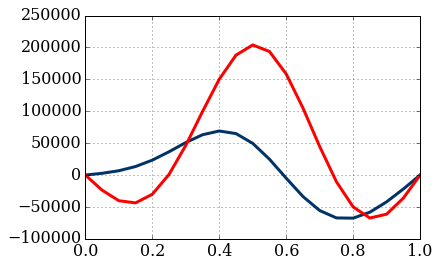

In [68]:
pyplot.plot(x, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)
pyplot.plot(x, psi.imag, color='r', ls='-', lw=3);
pyplot.grid(True)

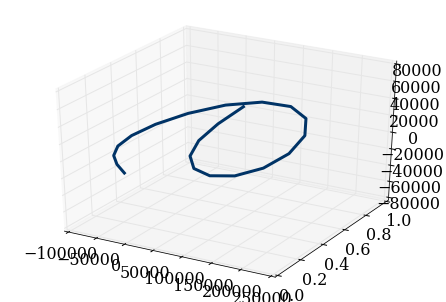

In [80]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init()

ax.plot(psi.imag, x, psi.real, color = '#003366', lw =3)


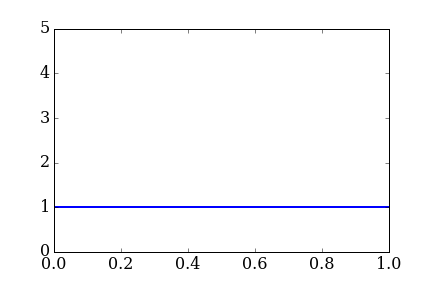
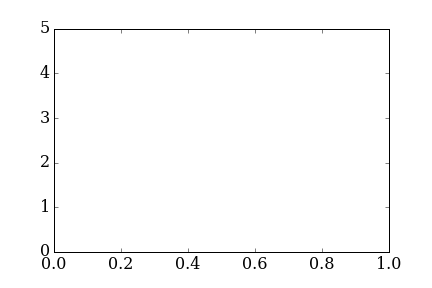
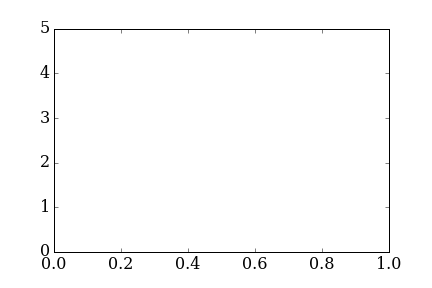
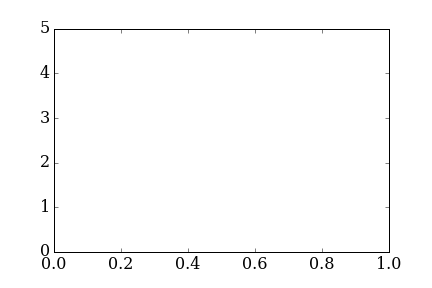
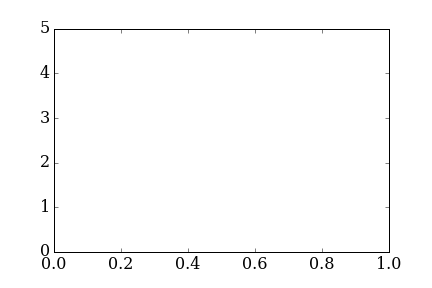
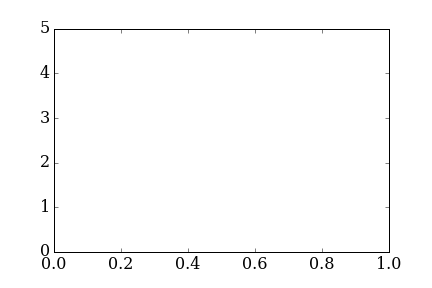
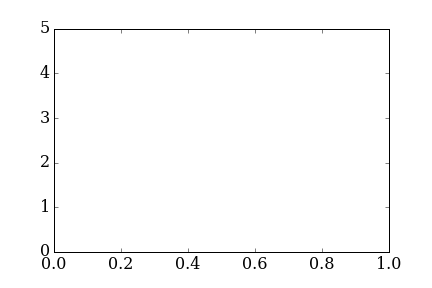
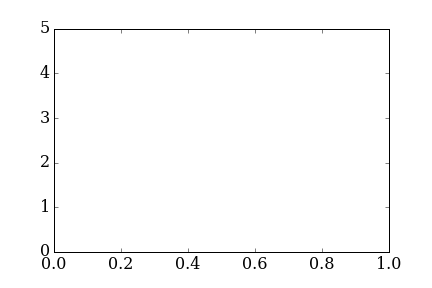
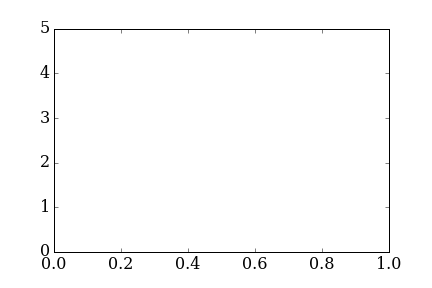
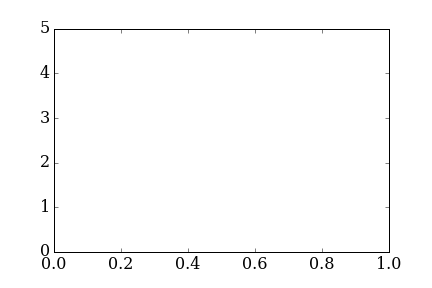
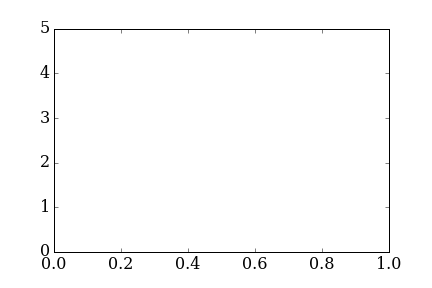
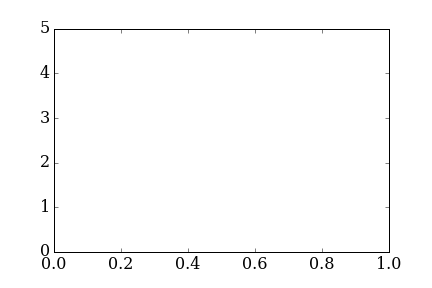
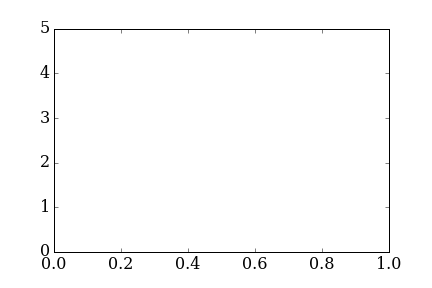
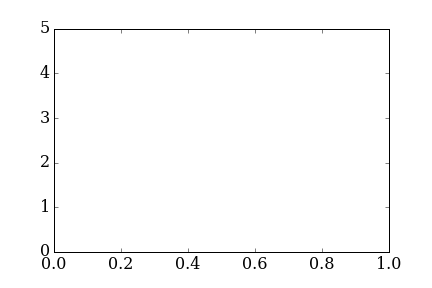
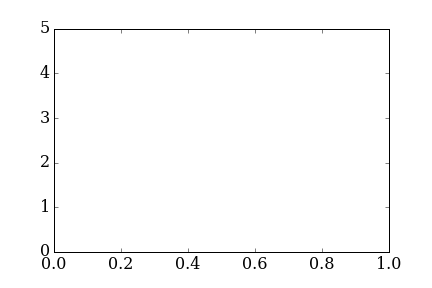
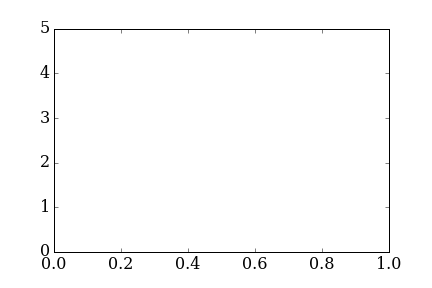
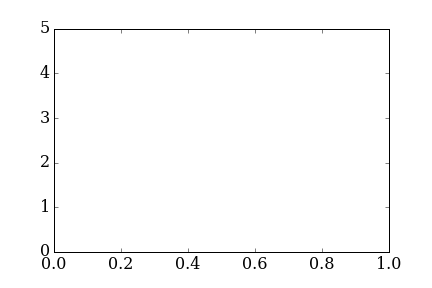
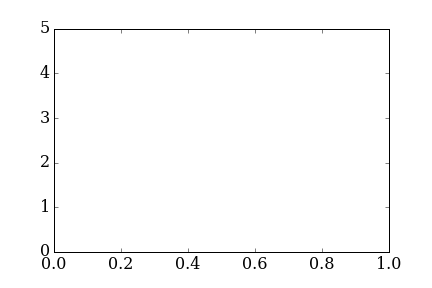
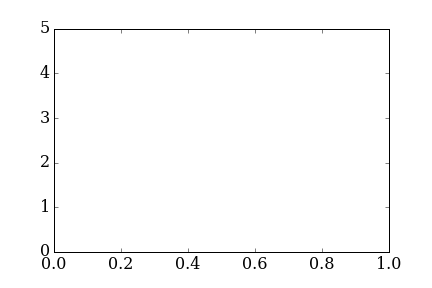
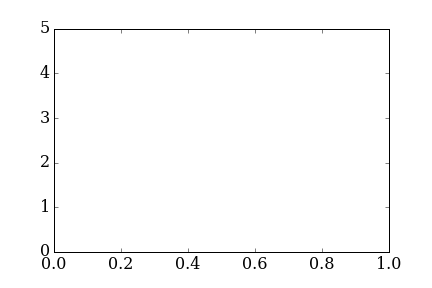
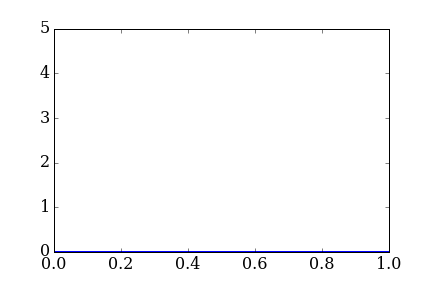

In [70]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (0,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)

display_animation(anim, default_mode = 'once')


In [71]:
psi_conj = numpy.conj(psi)
probfunc = psi_conj*psi

#print(psi_conj)
#print()
print(probfunc)
probfunc_real = probfunc.real
print(probfunc_real)

[  1.00000000e+00+0.j   5.69124503e+08+0.j   1.66697283e+09+0.j
   2.08711946e+09+0.j   1.45488714e+09+0.j   1.33109021e+09+0.j
   4.75139561e+09+0.j   1.38899229e+10+0.j   2.73265440e+10+0.j
   3.95527233e+10+0.j   4.40695146e+10+0.j   3.81359006e+10+0.j
   2.51240783e+10+0.j   1.21833348e+10+0.j   5.09745493e+09+0.j
   4.63425617e+09+0.j   7.07796814e+09+0.j   7.93731928e+09+0.j
   5.53081521e+09+0.j   1.77887495e+09+0.j   0.00000000e+00+0.j]
[  1.00000000e+00   5.69124503e+08   1.66697283e+09   2.08711946e+09
   1.45488714e+09   1.33109021e+09   4.75139561e+09   1.38899229e+10
   2.73265440e+10   3.95527233e+10   4.40695146e+10   3.81359006e+10
   2.51240783e+10   1.21833348e+10   5.09745493e+09   4.63425617e+09
   7.07796814e+09   7.93731928e+09   5.53081521e+09   1.77887495e+09
   0.00000000e+00]


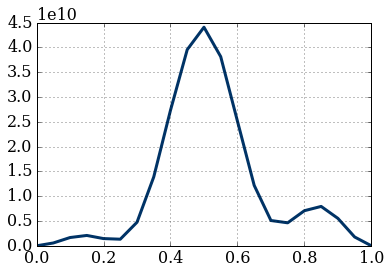

In [72]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);
pyplot.grid(True)


In [73]:
def psi_analytical(x, t, n_max, h, m, L, hbar):
    
    psi = 0
    for n in range (1, n_max+1):
        
        E = ((n**2)*(h**2))/(8*m*(L**2))
        
        summation = numpy.sqrt(2/L)*numpy.sin(n*numpy.pi*x/L)*numpy.exp(-1j*E*t/hbar)
        psi+= summation
        
    return psi


In [74]:
psi_analytical = psi_analytical(x, dt*nt, 1, h, m, L, hbar)
print(psi_analytical)

[  0.00000000e+00 +0.00000000e+00j   2.20810977e-01 -1.36380334e-02j
   4.36184856e-01 -2.69402531e-02j   6.40818415e-01 -3.95791144e-02j
   8.29672899e-01 -5.12434065e-02j   9.98098082e-01 -6.16459159e-02j
   1.14194678e+00 -7.05304983e-02j   1.25767695e+00 -7.76783857e-02j
   1.34243895e+00 -8.29135735e-02j   1.39414564e+00 -8.61071539e-02j
   1.41152384e+00 -8.71804904e-02j   1.39414564e+00 -8.61071539e-02j
   1.34243895e+00 -8.29135735e-02j   1.25767695e+00 -7.76783857e-02j
   1.14194678e+00 -7.05304983e-02j   9.98098082e-01 -6.16459159e-02j
   8.29672899e-01 -5.12434065e-02j   6.40818415e-01 -3.95791144e-02j
   4.36184856e-01 -2.69402531e-02j   2.20810977e-01 -1.36380334e-02j
   1.72861816e-16 -1.06765308e-17j]


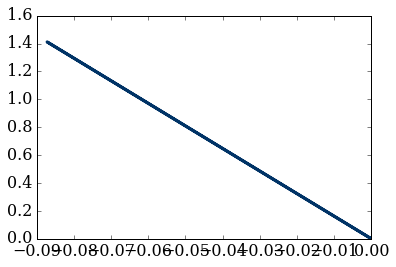

In [75]:
pyplot.plot(psi_analytical.imag, psi_analytical.real, color = '#003366', ls = '-', lw =3)

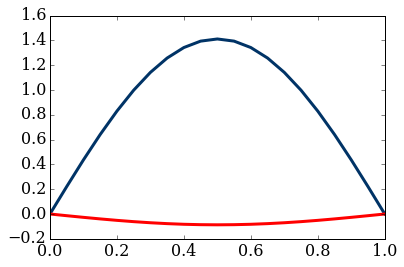

In [76]:
pyplot.plot(x, psi_analytical.real, color = '#003366', ls = '-', lw =3)
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

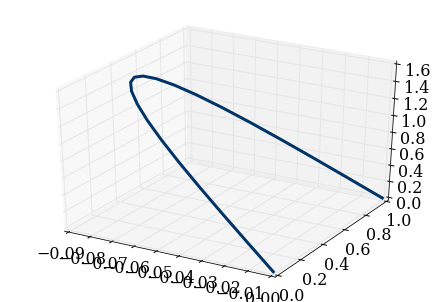

In [77]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init()

ax.plot(psi_analytical.imag, x, psi_analytical.real, color = '#003366', lw =3)
#ax = pyplot.axes(xlabel=('x'),ylabel=('Real'), zlabel=('Imaginary'));#

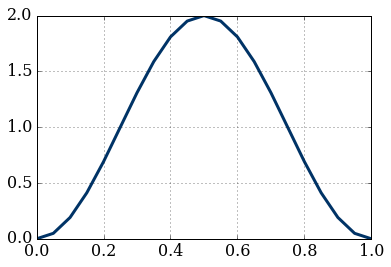

In [78]:
probfunc_analytical = numpy.conj(psi_analytical)*psi_analytical
pyplot.plot(x, probfunc_analytical.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)